## 1. Mean Absolute Error (MAE)
MAE calculates the average of the absolute differences between actual and predicted values. It provides a straightforward interpretation of the model's error in the same units as the target variable. It is robust for outliers. It is not differentiable at 0.

`Formula: MAE = (1/n) Σ |yᵢ - ŷᵢ|`


## 2. Mean Squared Error (MSE)
MSE measures the average squared differences between actual and predicted values. It penalizes larger errors more heavily, making it sensitive to outliers. It is differentiable at zero.

`Formula: MSE = (1/n) Σ (yᵢ - ŷᵢ)²`

## 3. Root Mean Squared Error (RMSE)
RMSE is the square root of MSE, providing an error metric in the same units as the target variable. It is commonly used to evaluate the accuracy of predictions. It emphasize larger errors, making them suitable for models where large deviations are critical.

`Formula: RMSE = √[(1/n) Σ (yᵢ - ŷᵢ)²]`

## 4. R-squared (R²)
R², or the coefficient of determination, measures how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit.

`Formula: R² = 1 - (Σ (yᵢ - ŷᵢ)² / Σ (yᵢ - ȳ)²)`

## Adjusted R-squared 
It is a statistical measure that modifies the R-squared value to account for the number of independent variables in a regression model. It provides a more accurate assessment of model performance by penalizing the addition of non-significant predictors, ensuring that only meaningful variables contribute to the model's explanatory power. The formula for adjusted R-squared is given by:

`Adjusted R² = 1 - (1 - R²) * (n - 1) / (n - k - 1)`
where n is the number of observations and k is the number of predictors(column). This makes adjusted R-squared a more reliable metric for evaluating the goodness of fit in regression analysis.

## Summary
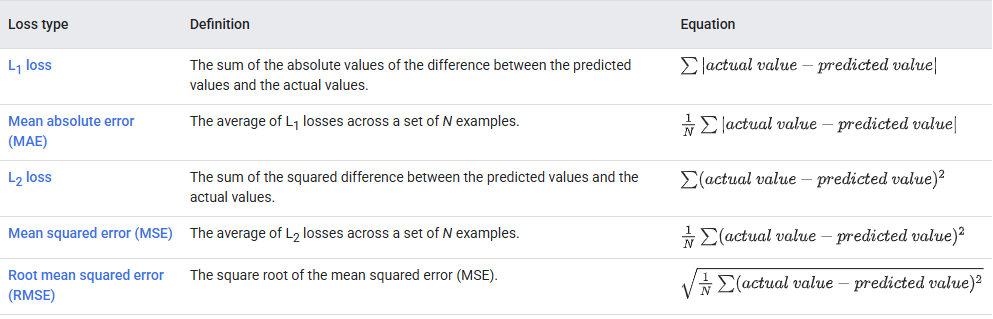

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

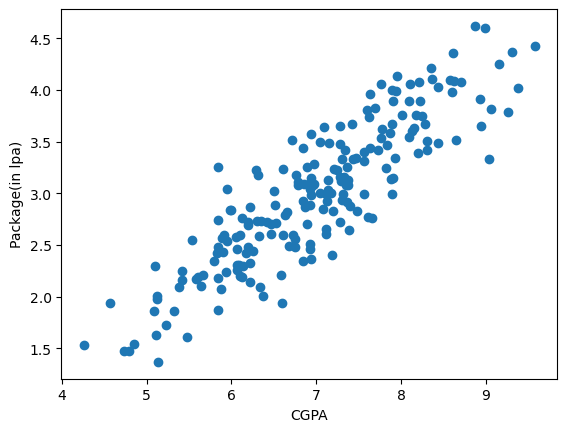

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Package(in lpa)')

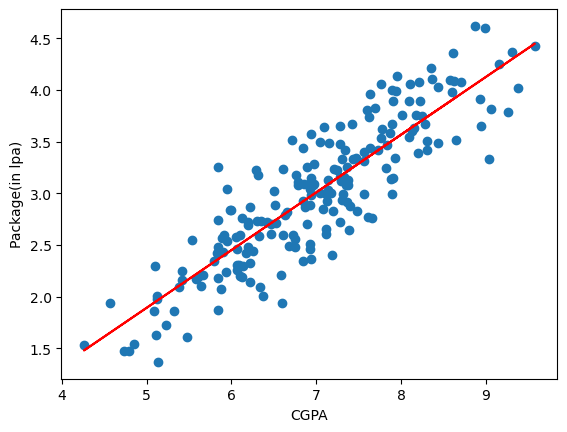

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
y_pred = lr.predict(X_test)

In [14]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [15]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [16]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [17]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [18]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [19]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [20]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [21]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.338058,3.26
1,5.12,0.927250,1.98
2,7.82,0.198818,3.25
3,7.42,0.600638,3.67
4,6.94,0.773313,3.57


Text(0, 0.5, 'Package(in lpa)')

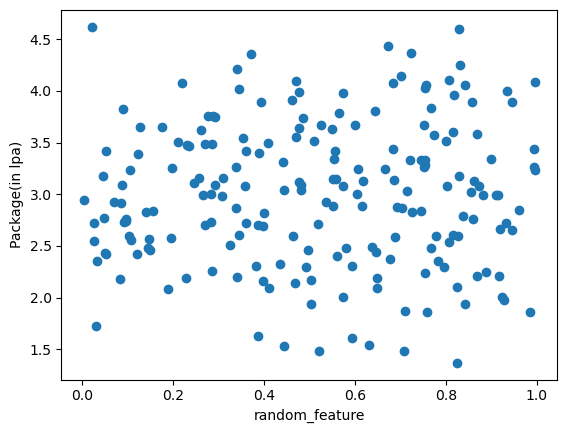

In [22]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [23]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = lr.predict(X_test)

In [28]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7784989394545088


In [29]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7665259091547525

In [30]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [31]:
new_df2.sample(5)

,cgpa,iq,package
185,6.31,3.78,3.18
98,7.69,4.43,3.83
151,6.12,1.76,2.76
2,7.82,3.35,3.25
26,8.31,2.82,3.42


Text(0, 0.5, 'Package(in lpa)')

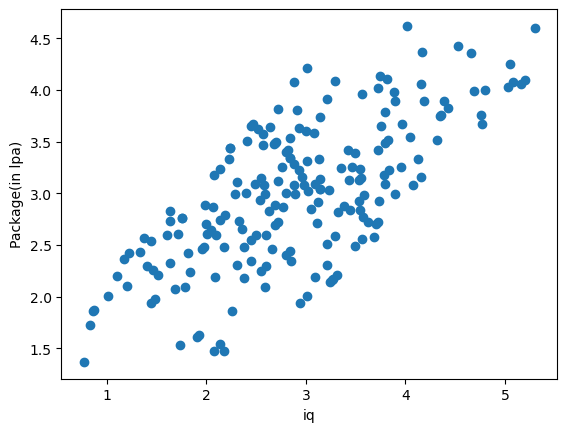

In [32]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [33]:
np.random.randint(-100,100)

-19

In [34]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [37]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8261486712776036


In [38]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.816751302157474